# 연습문제: 소설 등장인물 이름 워드클라우드 제작
- 구텐베르그 프로젝트의 소설 말뭉치 중 하나를 골라서 등장인물 이름의 빈도 플롯과 워드클라우드를 제작하라

In [1]:
import nltk

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [11]:
# 말뭉치 만들고
alice_raw = nltk.corpus.gutenberg.raw("carroll-alice.txt")
alice_raw[:800]

"[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit"

In [12]:
# 말뭉치를 토큰화
from nltk.tokenize import word_tokenize

In [18]:
alice_token = word_tokenize(alice_raw)

In [26]:
# 토큰화 이후 정규화
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
alice_lm = [lm.lemmatize(w, pos = "v") for w in alice_token]

In [30]:
# 품사 부착
from nltk.tag import pos_tag
alice_tag = pos_tag(alice_lm)

In [36]:
# 불용어
from nltk.corpus import stopwords
stopword = stopwords.words("english")

In [40]:
# FreqDist 클래스 사용해 빈도분석
from nltk import FreqDist
name_list = [t[0] for t in alice_tag if t[1] == "NNP" and t[0] not in stopword and t[0] != "*"]
fd_names = FreqDist(name_list)
fd_names

FreqDist({'Alice': 392, 'Queen': 71, 'King': 60, 'Turtle': 58, 'Mock': 56, 'Gryphon': 54, 'Hatter': 49, 'Rabbit': 40, 'Dormouse': 39, 'Duchess': 36, ...})

In [44]:
fd_names.N(), fd_names["Alice"], fd_names.freq("Alice")

(1606, 392, 0.24408468244084683)

In [47]:
fd_names.most_common(5)

[('Alice', 392), ('Queen', 71), ('King', 60), ('Turtle', 58), ('Mock', 56)]

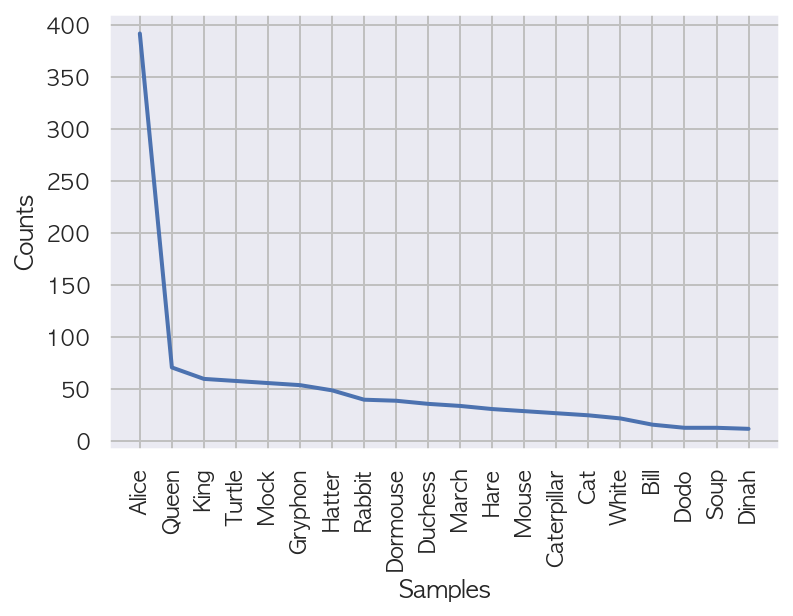

In [48]:
# 빈도 플롯
fd_names.plot(20)
plt.show()

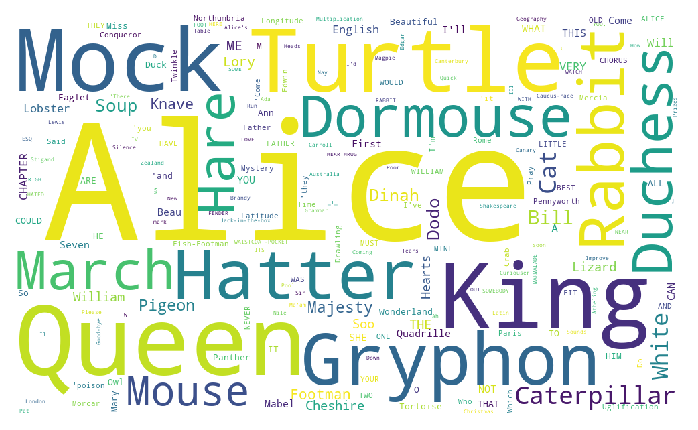

In [54]:
# 워드 클라우드

from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 600, background_color = "white", random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()